## goal: try to predict age of a person based on biomarkers
i have chosen an age prediction dataset from kaggle(avaliable [here](https://www.kaggle.com/competitions/precision-health-predicting-human-age-with-biomark/data))

the dataset contains a sample of 3000 people with their age, biomarkers and other features


In [166]:
# import basic libraries
import pandas as pd
import numpy as np
random_state = 42

## data loading 
- load data and display basic info

In [167]:
train_data = pd.read_csv(
    './precision-health-predicting-human-age-with-biomark/Train.csv')

display(train_data)

,ID,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,1,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,2,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,3,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,4,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,5,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,2997,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,2998,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,2999,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30


In [168]:
display(train_data.describe())
display(train_data.info())
display(train_data.isnull().sum().sort_values(ascending=False))


,ID,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,866.169729,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,1.000000,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,750.750000,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,1500.500000,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,2250.250000,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,3000.000000,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3000 non-null   int64  
 1   Gender                       3000 non-null   object 
 2   Height (cm)                  3000 non-null   float64
 3   Weight (kg)                  3000 non-null   float64
 4   Blood Pressure (s/d)         3000 non-null   object 
 5   Cholesterol Level (mg/dL)    3000 non-null   float64
 6   BMI                          3000 non-null   float64
 7   Blood Glucose Level (mg/dL)  3000 non-null   float64
 8   Bone Density (g/cm²)         3000 non-null   float64
 9   Vision Sharpness             3000 non-null   float64
 10  Hearing Ability (dB)         3000 non-null   float64
 11  Physical Activity Level      3000 non-null   object 
 12  Smoking Status               3000 non-null   object 
 13  Alcohol Consumptio

None

Family History                 1451
Chronic Diseases               1299
Alcohol Consumption            1201
Medication Use                 1198
Education Level                 627
Diet                              0
Income Level                      0
Sun Exposure                      0
Pollution Exposure                0
Stress Levels                     0
Sleep Patterns                    0
Mental Health Status              0
Cognitive Function                0
ID                                0
Gender                            0
Smoking Status                    0
Physical Activity Level           0
Hearing Ability (dB)              0
Vision Sharpness                  0
Bone Density (g/cm²)              0
Blood Glucose Level (mg/dL)       0
BMI                               0
Cholesterol Level (mg/dL)         0
Blood Pressure (s/d)              0
Weight (kg)                       0
Height (cm)                       0
Age (years)                       0
dtype: int64

- looks like there are some missing values in the dataset - i will try to fill them somehow later
- another problem are the categorical variables - i will try to convert them to numerical
- i will also try to separate blood pressure into systolic and diastolic as it isn't meaningful as a single categorical value

## feature engineering

In [169]:

# separate blood pressure into systolic and diastolic
blood_pressure = 'Blood Pressure (s/d)'
train_data['SystolicBP'] = train_data[blood_pressure].str.split(
    '/').str[0].astype(int)
train_data['DiastolicBP'] = train_data[blood_pressure].str.split(
    '/').str[1].astype(int)


train_data.drop(columns=[blood_pressure], inplace=True)

## handling categorical data
- i have identified several ordinal variables - will create special pandas categories for them 
- i will keep the nominal variables as they are and later convert them to dummies

In [170]:

# define ordinal variables
ordinal = ['Physical Activity Level', 'Income Level', 'Education Level', 'Mental Health Status']


# convert moderate to medium in Physical Activity Level, keep the rest
# this will allow me to use the same category as for income level
train_data['Physical Activity Level'] = train_data['Physical Activity Level'].map({'Moderate':'Medium', 'High':'High', 'Low':'Low'})


# define the categories for the ordinal variables
level = pd.api.types.CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)
education_level = pd.api.types.CategoricalDtype(categories=['High School', 'Undergraduate', 'Postgraduate'], ordered=True)
mental_health_status = pd.api.types.CategoricalDtype(categories=['Poor', 'Fair', 'Good', 'Excellent'], ordered=True)

# convert the ordinal variables to the new categories
train_data['Physical Activity Level'] = train_data['Physical Activity Level'].astype(level)
train_data['Income Level'] = train_data['Income Level'].astype(level)
train_data['Education Level'] = train_data['Education Level'].astype(education_level)
train_data['Mental Health Status'] = train_data['Mental Health Status'].astype(mental_health_status)

# display the unique values of the categorical variables
for col in train_data.select_dtypes('category').columns:
    display(col)
    display(train_data[col].unique())


# print ordinal columns
display(train_data.select_dtypes('category').columns)

# print nominal columns
display(train_data.select_dtypes('object').columns)


'Physical Activity Level'

['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

'Mental Health Status'

['Good', 'Poor', 'Fair', 'Excellent']
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

'Education Level'

[NaN, 'Undergraduate', 'High School', 'Postgraduate']
Categories (3, object): ['High School' < 'Undergraduate' < 'Postgraduate']

'Income Level'

['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

Index(['Physical Activity Level', 'Mental Health Status', 'Education Level',
       'Income Level'],
      dtype='object')

Index(['Gender', 'Smoking Status', 'Alcohol Consumption', 'Diet',
       'Chronic Diseases', 'Medication Use', 'Family History',
       'Sleep Patterns'],
      dtype='object')

In [171]:
# convert the newly created categorical variables to their numerical representation
for col in train_data.select_dtypes('category').columns:
    train_data[col] = train_data[col].cat.codes

In [172]:
# final check of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Empty DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3000 non-null   int64  
 1   Gender                       3000 non-null   object 
 2   Height (cm)                  3000 non-null   float64
 3   Weight (kg)                  3000 non-null   float64
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   int8   
 11  Smoking Status               3000 non-null  

In [173]:
# convert nominal variables to dummies
train_data = pd.get_dummies(train_data)


In [174]:
# handle the missing values - i will fill them with -1
train_data.fillna(-1, inplace=True)
display(train_data)

,ID,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Chronic Diseases_Heart Disease,Chronic Diseases_Hypertension,Medication Use_Occasional,Medication Use_Regular,Family History_Diabetes,Family History_Heart Disease,Family History_Hypertension,Sleep Patterns_Excessive,Sleep Patterns_Insomnia,Sleep Patterns_Normal
0,1,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,1,...,False,False,False,False,False,False,False,False,True,False
1,2,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,0,...,False,True,False,False,False,True,False,False,False,True
2,3,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,1,...,False,True,False,True,False,False,True,False,True,False
3,4,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,1,...,False,False,True,False,False,False,True,False,True,False
4,5,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,1,...,False,True,False,True,True,False,False,False,False,True
2996,2997,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,0,...,False,False,True,False,False,True,False,False,False,True
2997,2998,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,1,...,False,False,False,False,False,False,False,False,False,True
2998,2999,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,1,...,False,False,False,True,False,False,True,False,True,False


## data processing

In [176]:
# import basic libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [177]:
pred_column = 'Age (years)'

# split the data into train and rest
Xtrain, Xrest, ytrain, yrest = train_test_split(
    train_data.drop(columns=[pred_column]), train_data[pred_column], test_size=0.4, random_state=random_state
)

# split the rest into test and validation
Xtest, Xval, ytest, yval = train_test_split(
    Xrest, yrest, test_size=0.6, random_state=random_state
)


## train a baseline model 
- i will start with a simple decision tree regressor to get a baseline of the performance and gauge the complexity of the problem

Best depth: 6
Best RMSE: 6.226445128989748


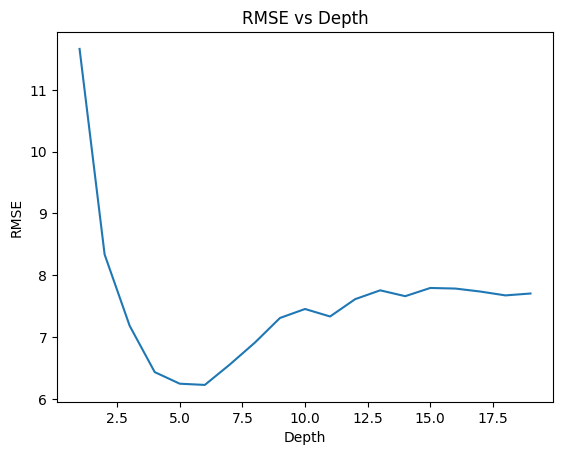

In [411]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

depths = range(1,20)

val_metric = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth = depth, random_state = random_state).fit(Xtrain, ytrain)
    val_metric.append(root_mean_squared_error(yval, model.predict(Xval)))

print(f"Best depth: {np.argmin(val_metric)+1}")
print(f"Best RMSE: {val_metric[np.argmin(val_metric)]}")

# plot
plt.plot(depths, val_metric)
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Depth')
plt.show()


even the simplest model seems to perform quite well - it is able to predict to age of a person with an error of 6.22 years RMSE on the validation set

## XGBoost
i will try to improve the results using XGBoost, which is commonoly used for tabular data



[0]	validation_0-rmse:20.48304
[100]	validation_0-rmse:9.36461
[200]	validation_0-rmse:6.14156
[300]	validation_0-rmse:5.43617
[400]	validation_0-rmse:5.29362
[500]	validation_0-rmse:5.26417
[600]	validation_0-rmse:5.25922
[700]	validation_0-rmse:5.26011
[731]	validation_0-rmse:5.26055
MSE on validation set: 27.65423119409393
RMSE on val: 5.258729047411925
MSE on train set: 0.562245008279519
R2 of the model: 0.935077965259552


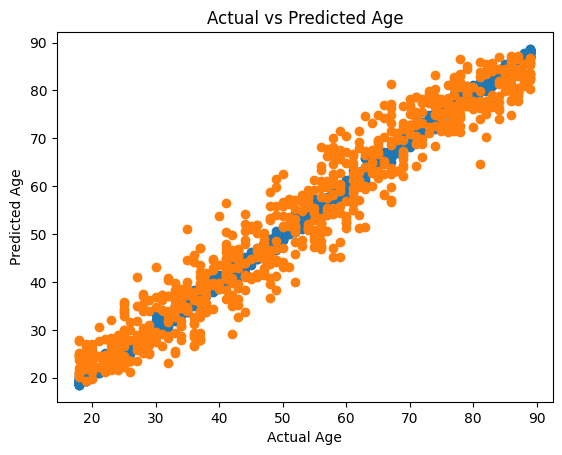

In [180]:
# train a xgboost model to predict age with regularization parameters
model = XGBRegressor(
    max_depth=10,  # Reduce tree depth (default is 6)
    learning_rate=0.01,  # Lower learning rate (default is 0.3)
    n_estimators=1000,  # Increase number of trees
    min_child_weight=5,  # Increase minimum sum of instance weight in child
    subsample=0.8,  # Use 80% of data per tree
    colsample_bytree=0.8,  # Use 80% of features per tree
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    early_stopping_rounds=100 # Stop if validation score doesn't improve
)

# Use validation set for early stopping
model.fit(Xtrain,
          ytrain,
          eval_set=[(Xval, yval)],
          verbose=100)



yval_pred = model.predict(Xval)

# print the MSE
msa_val = mean_squared_error(yval, yval_pred)
print(f"MSE on validation set: {msa_val}")
print("RMSE on val:", msa_val**0.5)

# predict on train data
ytrain_pred = model.predict(Xtrain)

# print the MSE
print(f"MSE on train set: {mean_squared_error(ytrain, ytrain_pred)}")
# plot the predicted vs actual
plt.scatter(ytrain, ytrain_pred)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')

plt.scatter(yval, yval_pred)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')


# R2 of the model
print(f"R2 of the model: {model.score(Xval, yval)}")


- this model - ensemble model comprised of decision trees - boosted random forrest - seems to perform better than the simple decision tree
    - it is able to predict to age of a person with an error of 5.26 years RMSE on the validation set
- there is a huge difference in performance between validation and train set - this is a sign of overfitting, which is expected when using decision tree models
- to understand if there are problems at some specific age bins, i will plot the residuals across the age range

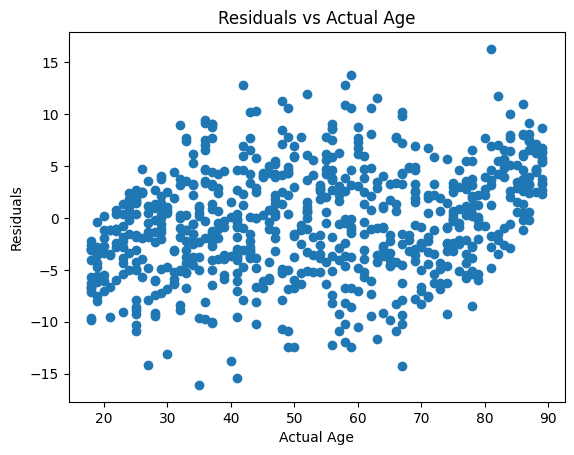

Median residual: -0.4153156280517578


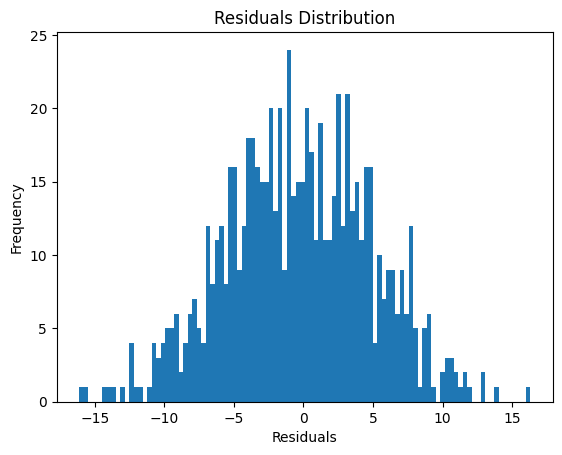

In [185]:
# performance in different age bins 

# plot the residuals
plt.scatter(yval, yval - yval_pred)
plt.xlabel('Actual Age')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Age')
plt.show()

# plot average residuals in bins of age
plt.hist(yval - yval_pred, bins=100)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')

# median residual 
print(f"Median residual: {np.median(yval - yval_pred)}")

- at least visually, there doesn't seem to be a problem with the model performance across the age range - no apparent trend in variance of residuals in any specific age bin
- i have also plotted the histogram of the residuals - it seems to be centered around 0 - which is good - suggesting the model does not bias towards older or younger people(median -0.42)
- seems like the residuals are normally distributed - meaning it any bias is not systematic but rather random and may be caused by random noise and the ~5 years precision of the data may not be improved upon unless more data is available

## cross validation
- i will try to improve the results using cross validation to find the best parameters for the 2 types of models

### decision tree
i will start with the decision tree regressor to see if it can be improved
and later apply the same approach to ensemble models
1. cross validation
2. grid search

Best depth: 5
Best RMSE: 6.296298522578502


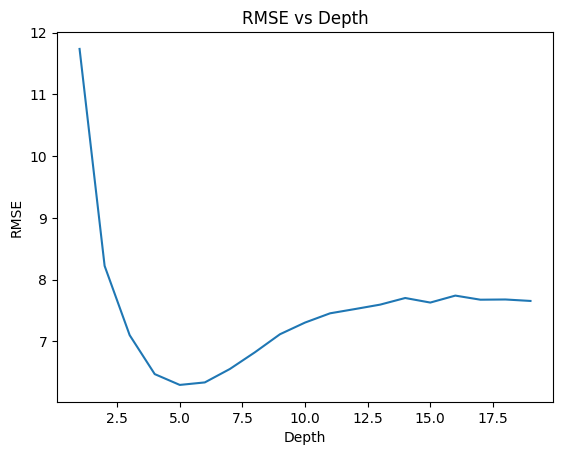

In [233]:
# cross validation on train data + val data
from sklearn.model_selection import cross_val_score


# merge train and val data back together such that cross validation can be used
X_train_val = pd.concat([Xtrain, Xval])
y_train_val = pd.concat([ytrain, yval])



# optimize the depth of the decision tree
depths = range(1,20)
val_metric = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=random_state, criterion='friedman_mse')
    scores = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')
    val_metric.append(-scores.mean())  # Negate since cross_val_score returns negative RMSE

# choose the best model 
best = np.argmin(val_metric)
print(f"Best depth: {best+1}")

# best RMSE 
print(f"Best RMSE: {val_metric[best]}")


# plot
plt.plot(depths, val_metric)
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Depth')
plt.show()


## grid search + cross validation

In [207]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16],
}

# Create decision tree
dt = DecisionTreeRegressor(random_state=random_state)

# Perform grid search
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_val, y_train_val)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 16, 'min_samples_split': 2}
Best RMSE: 6.18021799473388


it appears that i was able to achieve slightly better parameters with grid search and optimize the decision tree slightly further

## random forrest
- instead of XGBoost, i will use a simpler random forrest regressor to see if it can be improved


In [235]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=random_state)
model.fit(X_train_val, y_train_val)

# Grid search for random forrest
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_val, y_train_val)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


6429.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6429.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6429.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6429.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6429.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6429.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6429.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6429.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Best parameters: {'max_depth': 10, 'n_estimators': 1000}
Best RMSE: 5.38852903323154


i was able to achieve comparable results to the XGBoost model after parameter optimization of the random forrest regressor
- this model should help reduce variance of the prediction - which it did - the RMSE is now 5.39(when compared to 6+ on decision tree)

- to understand how to model works - i plotted the feature importances
    - the best predictor of age seems to be the bone density and vision sharpness, which is expected, but i would also expect BMI to be a good predictor - as people tend to get more obese with age, but it doesn't seem to be the case

In [229]:

# plot the feature importance using plotly

import plotly.express as px

fig = px.bar(x=X_train_val.columns, y=clf.feature_importances_)
fig.update_layout(title='Feature Importance')
fig.update_xaxes(title='Features')
fig.update_yaxes(title='Importance')
# sort by importance
fig.update_xaxes(categoryorder='total ascending')
fig.show()


## adaboost 
- should help improve bias 

In [244]:
## adaboost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=random_state)

# Grid search for random forrest
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1],
    'loss': ['linear', 'square', 'exponential'],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_val, y_train_val)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 500}
Best RMSE: 5.805832468393518


bias was not expected to be a problem - and it isn't - adaboost is slightly worse than bagging(random forrest) model

## ridge regression
- i was only using decision tree based approaches so far - will try regularized(ridge) regression to try and improve the outcomes


In [289]:
from sklearn.linear_model import Ridge

def ridge_regression(X_train_val, y_train_val):
    """
    Ridge regression with param optimization and cross validation 
    """
    model = Ridge(random_state=random_state)

    param_grid = {
        'alpha': [0.01, 0.1, 0.2, 1, 10]
        
    }

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train_val, y_train_val)

    print("Best parameters:", grid_search.best_params_)
    print("Best RMSE:", -grid_search.best_score_)

ridge_regression(X_train_val, y_train_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'alpha': 0.2}
Best RMSE: 5.242226397613262


In [310]:
# try with scaled data
scaler = StandardScaler()
scaler.fit(X_train_val)
X_train_val_scaled = scaler.transform(X_train_val)

ridge_regression(X_train_val_scaled, y_train_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'alpha': 1}
Best RMSE: 5.24210379886099


- ridge regression seems to produce even better outcomes 
- scaling(standardization) doesn't really cause great improvements
- i will try to improve the results using PCA - to improve signal/noise ratio and reduce dimensionality

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'alpha': 10}
Best RMSE: 6.646427925549162


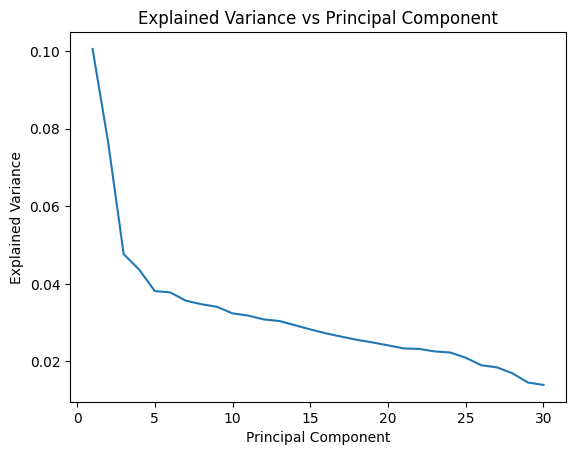

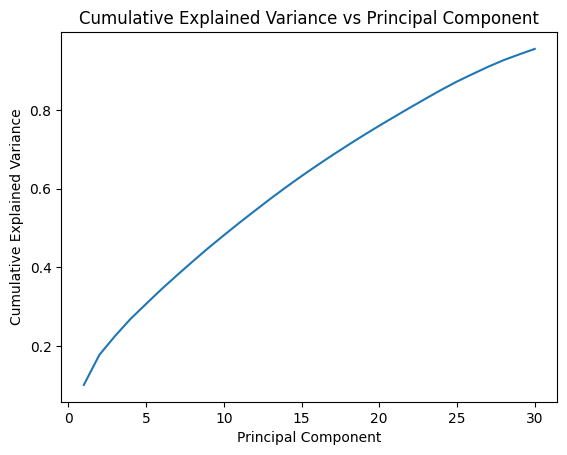

In [303]:
# PCA transform
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train_val_scaled)
X_train_val_pca = pca.transform(X_train_val_scaled)

ridge_regression(X_train_val_pca, y_train_val)


# plot the explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs Principal Component')
plt.show()

# cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Principal Component')
plt.show()

- PCA doesn't seem to help - in fact, it only makes it worse

## support vector regression - introduce non-linearity
- non-linear relationships could help - could add kernel functions to regression models - will therefore try SVM regression with different kernels


In [325]:

# optimize params 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

model = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_val_scaled, y_train_val)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


17669.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
17669.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
17669.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
17669.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
17669.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
17669.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
17669.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
17669.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE: 5.267958258517173


- the introduction of non-linearity in SVM regression didn't seem to help, but the results are comparable to the other models


## basis expansion
- i will try to improve the results using basis expansion to add other features to the model


In [420]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def create_transformations(X):
    return np.column_stack([
        # Original features
        X,
        # Trigonometric
        np.sin(X),
        np.cos(X),
    ])


# Create pipeline
model = Pipeline([
    ('transform', FunctionTransformer(create_transformations)),
    ('regression', LinearRegression())
])



In [421]:
model.fit(X_train_val, y_train_val)

# evaluate using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')
print(f"RMSE: {-scores.mean()}")



RMSE: 5.193597334325494


- trigonometric features actually helped the most - linear regression with this
transformation performed the best - 5.19 RMSE

# discussion
- linear regression with basis expansion performed the best - 5.19 RMSE
- what might be a problem is that this model is not regularized and it might be unstable - also the trigonometric feeatures are a little bit arbitrary and odd 
    - if the features are more correlated in the prediction, it might give odd results
    - but the regularization of the model actually somewhat hurts performance

- i will proceed with testing the linear regression with basis expansion on the test set

RMSE on test set: 5.087112643538054


/Users/matejkubovcak/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



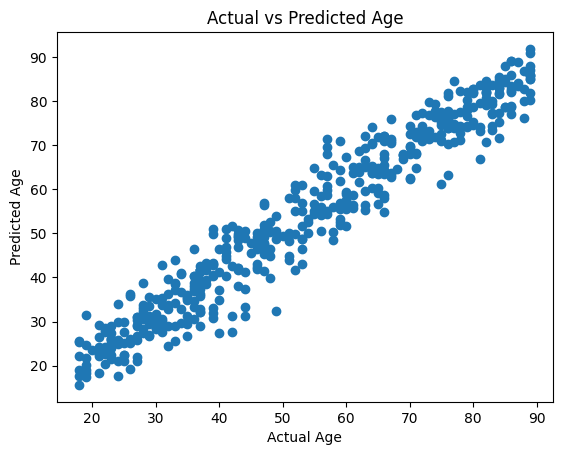

R2 of the model: 0.9412234631136134


In [424]:
# test the model on Xtest
ytest_pred = model.predict(Xtest)

# print the RMSE
print(f"RMSE on test set: {mean_squared_error(ytest, ytest_pred, squared=False)}")

# plot the predicted vs actual
plt.scatter(ytest, ytest_pred)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

# R2 of the model
print(f"R2 of the model: {model.score(Xtest, ytest)}")

# conclusion 
- the model performed surprisingly well - 5.09 RMSE on the test set
- this means it wasn't overfitting and it generalizes well
- the model explains ~94% of the variance in the test set
- the model is able to predict the age of a person with an expected error of ~5 years based on ~20 features